In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/MYK/Desktop/IRES/scripts')

import numpy as np
import matplotlib.pyplot as plt
import utils as u
import fake_profile as fp

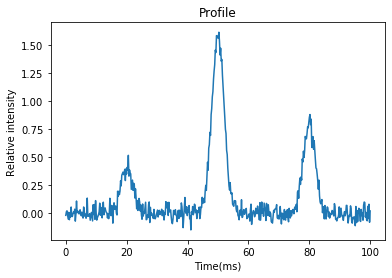

In [5]:
amp1 = [2, 8, 4]; mu1 = [20, 50, 80]; sd1 = [2, 2, 2]
amp2 = [2, 8, 6]; mu2 = [20, 50, 80]; sd2 = [2, 2, 2]
amp3 = [2, 8, 8]; mu3 = [20, 50, 80]; sd3 = [2, 2, 2]

null = fp.fake_profile(amp1, mu1, sd1); null.construct_profile(noise=True, wn_sigma=.05)
prof1 = fp.fake_profile(amp1, mu1, sd1)
prof2 = fp.fake_profile(amp2, mu2, sd2)
prof3 = fp.fake_profile(amp3, mu3, sd3)

null.plot()

In [11]:
#15 fake profiles differences against null, first 5 is same as null, 
#next 5 have 3rd peak amplitude increase, 
#next 5 have even greater 3rd peak amplitude increase
objects = [prof1, prof2, prof3]
diffs = []

for i in objects:
    for j in range(5):
        i.construct_profile(noise=True, wn_sigma=.05)
        diffs.append(null.profile - i.profile)

diffs = np.array(diffs)

In [20]:
#connect as a single timeseries for fake arcwise testing
timeseries = []

for i in objects:
    for j in range(5):
        i.construct_profile(noise=True, wn_sigma=.05)
        timeseries.append(i.profile)
        
timeseries = np.array(timeseries)

In [31]:
timeseries = np.reshape(timeseries,(1, -1))[0]

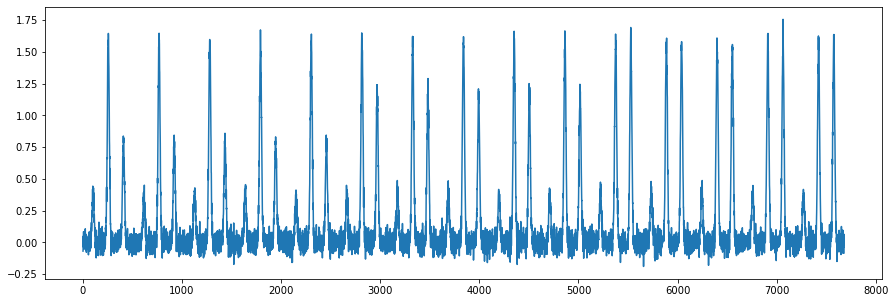

In [36]:
fig = plt.figure(figsize=(15, 5))
plt.plot(timeseries)

In [37]:
np.savetxt('./R_wavelet/fake_diffs.txt', diffs)
np.savetxt('./R_wavelet/fake_arcwise_timeseries.txt', timeseries)